<a href="https://colab.research.google.com/github/NarmadaH/AIRecommenderFE/blob/main/Deep_Learning_First_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Base Model Setup














In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers import Adam, Nadam, Adagrad, RMSprop, SGD
from keras import regularizers
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

In [ ]:
# Load the dataset
digits = load_digits()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

# Convert the target variables to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train.shape

(1437, 64)

In [ ]:
def use_model(model, compile = True, batch_size = 100, epochs = 10):
  # Compile the model categorical_crossentropy
  if(compile == True):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Train the model
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

  train_loss = history.history['loss']
  train_acc = history.history['accuracy']
  val_loss = history.history['val_loss']
  val_acc = history.history['val_accuracy']
  print('Training loss:', train_loss[epochs-1])
  print('Training accuracy:', train_acc[epochs-1])
  print('Validation loss:', val_loss[epochs-1])
  print('Validation accuracy:', val_acc[epochs-1])

  ep = range(1, epochs+1)

  # Plot the training and validation accuracy and loss values
  plt.plot(ep, history.history['accuracy'], color='blue', label='Training Accuracy')
  plt.plot(ep, history.history['val_accuracy'], color='green', label='Validation Accuracy')
  plt.plot(ep, history.history['loss'], color='red', label='Training Loss')
  plt.plot(ep, history.history['val_loss'], color='orange', label='Validation Loss')
  plt.title('Model Accuracy and Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy / Loss')
  plt.legend(loc='upper left')
  plt.show()

  # plt.plot(ep, train_loss, color='blue', label='Training Loss')
  # plt.plot(ep, val_loss, color='red', label='Validation Loss')
  # plt.title('Training and Validation Loss')
  # plt.xlabel('Epochs')
  # plt.ylabel('Loss')
  # plt.legend(loc='upper right')
  # plt.show()

  # plt.plot(ep, train_acc, color='blue', label='Training accuracy')
  # plt.plot(ep, val_acc, color='red', label='Validation accuracy')
  # plt.title('Training and validation accuracy')
  # plt.xlabel('Epochs')
  # plt.ylabel('Accuracy')
  # plt.legend(loc='lower right')
  # plt.show()

  # Evaluate the model on the test set
  scores = model.evaluate(X_test, y_test, verbose=0)

  # y_pred = model.predict(X_test)
  # y_pred = np.round(y_pred)
  # print(classification_report(y_test, y_pred))

  # Evaluate the model
  y_pred = model.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)

  #len = 20
  # for i in range(0, len):
  #   print("y_pred", y_pred[i])
  #   print("y_test_classes", y_test_classes[i])

  # Compute confusion matrix
  confusion = confusion_matrix(y_test_classes, y_pred_classes)

  # Create heatmap of confusion matrix
  sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.title('Confusion Matrix')
  plt.show()

  # Compute accuracy, specificity, sensitivity, PPVs, and NPVs
  total = np.sum(confusion)
  accuracy = np.trace(confusion) / float(total)
  specificity = np.diag(confusion)[0] / np.sum(confusion[0])
  sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
  ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
  npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

  # Print the results
  print("Accuracy:", accuracy)
  print("Loss: {:.2f}".format(scores[0]))
  print("Specificity:", specificity)
  print("Sensitivity:", sensitivity)

Training loss: 0.19376614689826965
Training accuracy: 0.9478079080581665
Validation loss: 0.1495143324136734
Validation accuracy: 0.9527778029441833


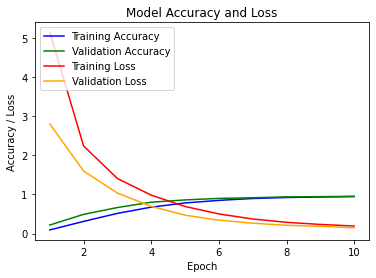

12/12 [==============================] - 0s 3ms/step


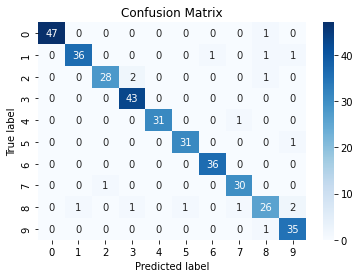

Accuracy: 0.9527777777777777
Loss: 0.15
Specificity: 0.9791666666666666
Sensitivity: 0.9230769230769231


In [ ]:
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=64))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

use_model(model)

# **Dropout Regularization - Nourin**

Training loss: 0.06945906579494476
Training accuracy: 0.9784272909164429
Validation loss: 0.07516186684370041
Validation accuracy: 0.9750000238418579


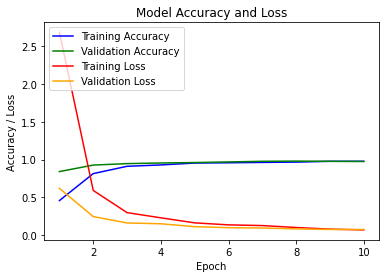

12/12 [==============================] - 0s 2ms/step


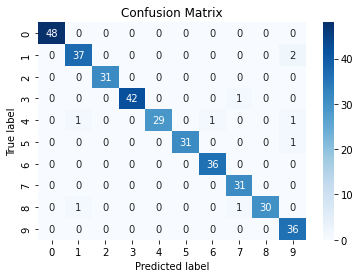

Accuracy: 0.975
Loss: 0.08
Specificity: 1.0
Sensitivity: 0.9487179487179487


In [ ]:
model_dropout = keras.Sequential([
    Dense(64, activation='relu', input_dim=64),
    keras.layers.Dropout(0.05),
    Dense(30, activation='relu'),
    #keras.layers.Dropout(0.10),5%
    Dense(10, activation='sigmoid'),
])

use_model(model_dropout, True, 10)

# **Gradient Decent - Nourin**

# **Stochastic Gradient Decent**

---



Training loss: 0.01051590871065855
Training accuracy: 0.9993041157722473
Validation loss: 0.05040446296334267
Validation accuracy: 0.9833333492279053


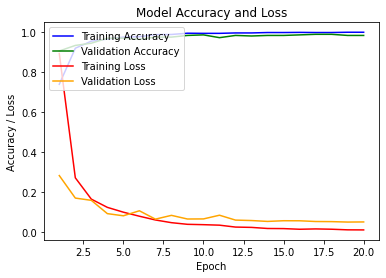

12/12 [==============================] - 0s 2ms/step


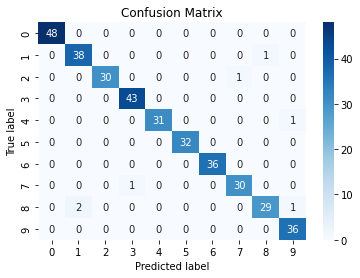

Accuracy: 0.9805555555555555
Loss: 0.05
Specificity: 1.0
Sensitivity: 0.9743589743589743


In [ ]:
modelSdecend = keras.Sequential([
    Dense(64, activation='relu', input_dim=64),
    Dense(30, activation='relu'),
    Dense(10, activation='sigmoid'),
])

modelSdecend.compile(SGD(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

use_model(modelSdecend, False, 1, 20)

# **Batch Gradient Decent**

Training loss: 0.030878262594342232
Training accuracy: 0.9972164034843445
Validation loss: 0.06410858780145645
Validation accuracy: 0.980555534362793


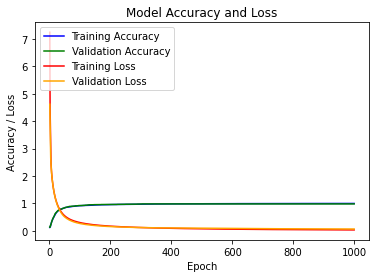

12/12 [==============================] - 0s 3ms/step


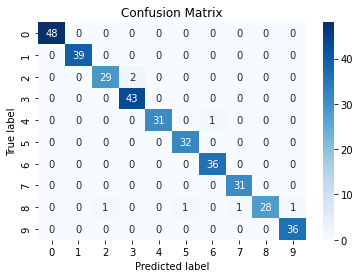

Accuracy: 0.9805555555555555
Loss: 0.06
Specificity: 1.0
Sensitivity: 1.0


In [ ]:

modelBSdecend = keras.Sequential([
    Dense(64, activation='relu', input_dim=64),
    Dense(30, activation='relu'),
    Dense(10, activation='sigmoid'),
])
modelBSdecend.compile(SGD(learning_rate=.01), loss='categorical_crossentropy', metrics=['accuracy'])

use_model(modelBSdecend, False, 1437, 1000)

# **Mini Batch Gradient Decent**

Training loss: 0.061300911009311676
Training accuracy: 0.9853861927986145
Validation loss: 0.07500291615724564
Validation accuracy: 0.980555534362793


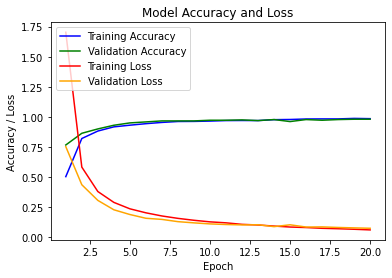

12/12 [==============================] - 0s 4ms/step


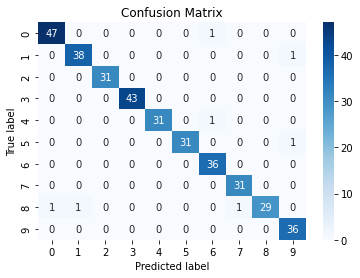

Accuracy: 0.9805555555555555
Loss: 0.08
Specificity: 0.9791666666666666
Sensitivity: 0.9743589743589743


In [ ]:
modelSdecend = keras.Sequential([
    Dense(64, activation='relu', input_dim=64),
    Dense(30, activation='relu'),
    Dense(10, activation='sigmoid'),
])

modelSdecend.compile(SGD(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])


use_model(modelSdecend, False, 5, 20)

# **Batch Normalization - Achini**

Epoch 1/10
15/15 [==============================] - 1s 21ms/step - loss: 5.8214 - accuracy: 0.2081 - val_loss: 2.8590 - val_accuracy: 0.3083
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 2.3061 - accuracy: 0.3556 - val_loss: 1.6333 - val_accuracy: 0.4639
Epoch 3/10
15/15 [==============================] - 0s 9ms/step - loss: 1.4275 - accuracy: 0.5080 - val_loss: 1.0134 - val_accuracy: 0.6694
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 0.9263 - accuracy: 0.6889 - val_loss: 0.6812 - val_accuracy: 0.7889
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 0.6444 - accuracy: 0.7996 - val_loss: 0.5106 - val_accuracy: 0.8417
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 0.4813 - accuracy: 0.8441 - val_loss: 0.4065 - val_accuracy: 0.8694
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.3743 - accuracy: 0.8824 - val_loss: 0.3325 - val_accuracy: 0.8944
Epoch 8/10
15/15 [

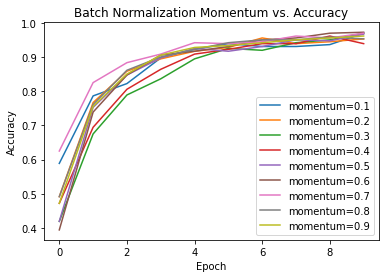

Epoch 1/10
15/15 [==============================] - 2s 25ms/step - loss: 2.4180 - accuracy: 0.2136 - val_loss: 1.8828 - val_accuracy: 0.4528
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 1.3156 - accuracy: 0.6193 - val_loss: 1.2469 - val_accuracy: 0.7194
Epoch 3/10
15/15 [==============================] - 0s 9ms/step - loss: 0.8468 - accuracy: 0.8142 - val_loss: 0.8512 - val_accuracy: 0.8111
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6235 - accuracy: 0.8678 - val_loss: 0.7262 - val_accuracy: 0.8722
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.4963 - accuracy: 0.9158 - val_loss: 0.5371 - val_accuracy: 0.9194
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.4058 - accuracy: 0.9408 - val_loss: 0.4485 - val_accuracy: 0.9306
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.3368 - accuracy: 0.9485 - val_loss: 0.4514 - val_accuracy: 0.9528
Epoch 8/10
15/15 [=

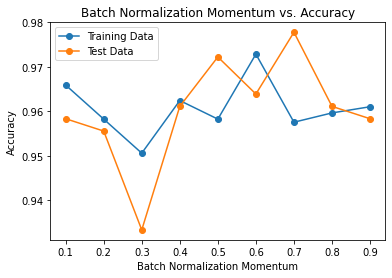

Epoch 1/10
15/15 [==============================] - 2s 25ms/step - loss: 2.2732 - accuracy: 0.2227 - val_loss: 1.7060 - val_accuracy: 0.3917
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 1.3262 - accuracy: 0.5818 - val_loss: 0.9652 - val_accuracy: 0.7167
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.8739 - accuracy: 0.7891 - val_loss: 0.7349 - val_accuracy: 0.8028
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6493 - accuracy: 0.8699 - val_loss: 0.6200 - val_accuracy: 0.8778
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.5127 - accuracy: 0.9123 - val_loss: 0.4608 - val_accuracy: 0.8861
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.4330 - accuracy: 0.9255 - val_loss: 0.4036 - val_accuracy: 0.9139
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.3591 - accuracy: 0.9402 - val_loss: 0.3876 - val_accuracy: 0.9167
Epoch 8/10
15/15 [=

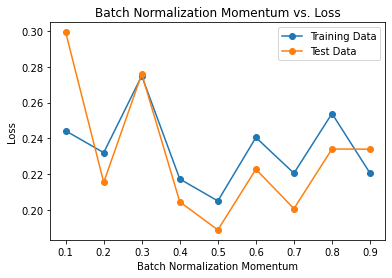

In [ ]:
# Define the neural network architecture
modelBNorm = Sequential()
modelBNorm.add(Dense(64, activation='relu', input_dim=64))
BatchNormalization(axis=1, momentum=0.06),
modelBNorm.add(Dense(30, activation='relu'))
BatchNormalization(axis=1, momentum=0.06),
modelBNorm.add(Dense(10, activation='sigmoid'))

# Compile the model
modelBNorm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
modelBNorm.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model on test data
scores = modelBNorm.evaluate(X_test, y_test, verbose=0)


# Evaluate the model
y_pred = modelBNorm.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, specificity, sensitivity, PPVs, and NPVs
total = np.sum(confusion)
accuracy = np.trace(confusion) / float(total)
specificity = np.diag(confusion)[0] / np.sum(confusion[0])
sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

# Print the results
print("Accuracy:", accuracy)
print("Loss: {:.2f}".format(scores[0]))
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)

# Define function to create and compile model
def create_model(momentum):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=64))
    model.add(BatchNormalization(axis=1, momentum=momentum))
    model.add(Dense(30, activation='relu'))
    model.add(BatchNormalization(axis=1, momentum=momentum))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Define list of momentum values to try
momentum_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Train and evaluate models for each momentum value
for momentum in momentum_values:
    model = create_model(momentum)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)
    plt.plot(history.history['val_accuracy'], label=f'momentum={momentum}')

plt.title('Batch Normalization Momentum vs. Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Layers all

# Define the regularization strengths to try
momentum_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Train a model for each regularization strength and record the validation accuracy
train_accuracies = []
test_accuracies = []

for momentum in momentum_values:
    # Define the model
    modelRegGraph = Sequential()
    modelRegGraph.add(Dense(64, activation='relu', input_dim=64))
    modelRegGraph.add(BatchNormalization(axis=1, momentum=momentum))
    modelRegGraph.add(Dense(30, activation='relu'))
    modelRegGraph.add(BatchNormalization(axis=1, momentum=momentum))
    modelRegGraph.add(Dense(10, activation='sigmoid'))

    # Compile the model
    modelRegGraph.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = modelRegGraph.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

    # Record the validation accuracy
    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)





# Plot the results
plt.plot(momentum_values, train_accuracies, '-o', label='Training Data')
plt.plot(momentum_values, test_accuracies, '-o', label='Test Data')
plt.legend()
plt.xlabel('Batch Normalization Momentum')
plt.ylabel('Accuracy')
plt.title('Batch Normalization Momentum vs. Accuracy')
plt.show()

# Layers all

# Define the regularization strengths to try
momentum_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Train a model for each regularization strength and record the validation accuracy
train_accuracies = []
test_accuracies = []

for momentum in momentum_values:
    # Define the model
    modelRegGraph = Sequential()
    modelRegGraph.add(Dense(64, activation='relu', input_dim=64))
    modelRegGraph.add(BatchNormalization(axis=1, momentum=momentum))
    modelRegGraph.add(Dense(30, activation='relu'))
    modelRegGraph.add(BatchNormalization(axis=1, momentum=momentum))
    modelRegGraph.add(Dense(10, activation='sigmoid'))

    # Compile the model
    modelRegGraph.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = modelRegGraph.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

    # Record the validation accuracy
    train_acc = history.history['loss'][-1]
    test_acc = history.history['val_loss'][-1]
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)





# Plot the results
plt.plot(momentum_values, train_accuracies, '-o', label='Training Data')
plt.plot(momentum_values, test_accuracies, '-o', label='Test Data')
plt.legend()
plt.xlabel('Batch Normalization Momentum')
plt.ylabel('Loss')
plt.title('Batch Normalization Momentum vs. Loss')
plt.show()



Epoch 1/10
15/15 [==============================] - 4s 38ms/step - loss: 2.2096 - accuracy: 0.2679 - val_loss: 2.0069 - val_accuracy: 0.4528
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 1.2495 - accuracy: 0.6326 - val_loss: 1.1450 - val_accuracy: 0.7250
Epoch 3/10
15/15 [==============================] - 0s 9ms/step - loss: 0.8385 - accuracy: 0.8058 - val_loss: 0.9845 - val_accuracy: 0.8389
Epoch 4/10
15/15 [==============================] - 0s 10ms/step - loss: 0.6226 - accuracy: 0.8740 - val_loss: 0.7531 - val_accuracy: 0.8917
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 0.4937 - accuracy: 0.9123 - val_loss: 0.4516 - val_accuracy: 0.8889
Epoch 6/10
15/15 [==============================] - 0s 11ms/step - loss: 0.4064 - accuracy: 0.9360 - val_loss: 0.4620 - val_accuracy: 0.9278
Epoch 7/10
15/15 [==============================] - 0s 11ms/step - loss: 0.3450 - accuracy: 0.9422 - val_loss: 0.4149 - val_accuracy: 0.9444
Epoch 8/10
15/15

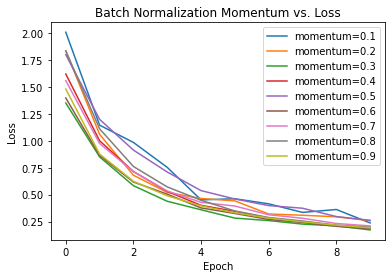

In [ ]:
# Define function to create and compile model
def create_model(momentum):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=64))
    model.add(BatchNormalization(axis=1, momentum=momentum))
    model.add(Dense(30, activation='relu'))
    model.add(BatchNormalization(axis=1, momentum=momentum))
    model.add(Dense(10, activation='sigmoid'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Define list of momentum values to try
momentum_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Train and evaluate models for each momentum value
for momentum in momentum_values:
    model = create_model(momentum)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)
    plt.plot(history.history['val_loss'], label=f'momentum={momentum}')

plt.title('Batch Normalization Momentum vs. Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Optimizers - Achini**

# **Adagrad**

In [ ]:
# Define the neural network architecture
modelReg = Sequential()
modelReg.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(0.07)))
modelReg.add(Dense(30, activation='relu'))
modelReg.add(Dense(10, activation='sigmoid'))



# Compile the model
modelReg.compile(Adagrad(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model
modelReg.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = modelReg.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, specificity, sensitivity, PPVs, and NPVs
total = np.sum(confusion)
accuracy = np.trace(confusion) / float(total)
specificity = np.diag(confusion)[0] / np.sum(confusion[0])
sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

# Print the results
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:84: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 10.2417 - accuracy: 0.1037 - val_loss: 8.7073 - val_accuracy: 0.0833
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 8.2837 - accuracy: 0.1183 - val_loss: 7.7344 - val_accuracy: 0.1472
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 7.6024 - accuracy: 0.1573 - val_loss: 7.2362 - val_accuracy: 0.1778
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 7.2269 - accuracy: 0.1872 - val_loss: 6.9247 - val_accuracy: 0.2056
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 6.9728 - accuracy: 0.2192 - val_loss: 6.7006 - val_accuracy: 0.2500
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 6.7764 - accuracy: 0.2470 - val_loss: 6.5257 - val_accuracy: 0.2833
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 6.6142 - accuracy: 0.2756 - val_loss: 6.3792 - val_accuracy: 0.3111
Epoch 8/10
15/15 [===========

# **Adam**

In [ ]:
# Define the neural network architecture
modelReg = Sequential()
modelReg.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(0.07)))
modelReg.add(Dense(30, activation='relu'))
modelReg.add(Dense(10, activation='sigmoid'))



# Compile the model
modelReg.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model
modelReg.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = modelReg.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, specificity, sensitivity, PPVs, and NPVs
total = np.sum(confusion)
accuracy = np.trace(confusion) / float(total)
specificity = np.diag(confusion)[0] / np.sum(confusion[0])
sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

# Print the results
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 23ms/step - loss: 7.9496 - accuracy: 0.1594 - val_loss: 6.0058 - val_accuracy: 0.3583
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 5.5699 - accuracy: 0.4322 - val_loss: 4.7975 - val_accuracy: 0.6056
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 4.5037 - accuracy: 0.6514 - val_loss: 3.9508 - val_accuracy: 0.7583
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 3.7326 - accuracy: 0.7926 - val_loss: 3.3202 - val_accuracy: 0.8583
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 3.1907 - accuracy: 0.8768 - val_loss: 2.8788 - val_accuracy: 0.8944
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 2.7919 - accuracy: 0.8921 - val_loss: 2.5292 - val_accuracy: 0.9361
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 2.4719 - accuracy: 0.9186 - val_loss: 2.2565 - val_accuracy: 0.9528
Epoch 8/10
15/15 [============

# **Nadam**

In [ ]:
# Define the neural network architecture
modelReg = Sequential()
modelReg.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(0.07)))
modelReg.add(Dense(30, activation='relu'))
modelReg.add(Dense(10, activation='sigmoid'))



# Compile the model
modelReg.compile(Nadam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model
modelReg.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = modelReg.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, specificity, sensitivity, PPVs, and NPVs
total = np.sum(confusion)
accuracy = np.trace(confusion) / float(total)
specificity = np.diag(confusion)[0] / np.sum(confusion[0])
sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

# Print the results
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 8.4141 - accuracy: 0.1496 - val_loss: 6.3711 - val_accuracy: 0.3750
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 5.7185 - accuracy: 0.4572 - val_loss: 5.0088 - val_accuracy: 0.6028
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 4.5803 - accuracy: 0.6785 - val_loss: 4.1606 - val_accuracy: 0.7500
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 3.8982 - accuracy: 0.8086 - val_loss: 3.6346 - val_accuracy: 0.8472
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 3.4261 - accuracy: 0.8664 - val_loss: 3.2170 - val_accuracy: 0.8917
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 3.0609 - accuracy: 0.9061 - val_loss: 2.8967 - val_accuracy: 0.9194
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 2.7538 - accuracy: 0.9255 - val_loss: 2.6152 - val_accuracy: 0.9306
Epoch 8/10
15/15 [============

# **RMSProp**

In [ ]:
# Define the neural network architecture
modelReg = Sequential()
modelReg.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(0.07)))
modelReg.add(Dense(30, activation='relu'))
modelReg.add(Dense(10, activation='sigmoid'))



# Compile the model
modelReg.compile(RMSprop(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model
modelReg.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = modelReg.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, specificity, sensitivity, PPVs, and NPVs
total = np.sum(confusion)
accuracy = np.trace(confusion) / float(total)
specificity = np.diag(confusion)[0] / np.sum(confusion[0])
sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

# Print the results
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 23ms/step - loss: 8.0662 - accuracy: 0.2178 - val_loss: 5.8384 - val_accuracy: 0.3611
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 5.1262 - accuracy: 0.5136 - val_loss: 4.5014 - val_accuracy: 0.6583
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 4.0934 - accuracy: 0.7411 - val_loss: 3.7056 - val_accuracy: 0.8028
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 3.4364 - accuracy: 0.8379 - val_loss: 3.1004 - val_accuracy: 0.8722
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 2.9416 - accuracy: 0.8866 - val_loss: 2.6899 - val_accuracy: 0.9028
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 2.5496 - accuracy: 0.9214 - val_loss: 2.3545 - val_accuracy: 0.9222
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 2.2136 - accuracy: 0.9367 - val_loss: 2.0213 - val_accuracy: 0.9472
Epoch 8/10
15/15 [============

# **SDG**

In [ ]:
# Define the neural network architecture
modelReg = Sequential()
modelReg.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(0.07)))
modelReg.add(Dense(30, activation='relu'))
modelReg.add(Dense(10, activation='sigmoid'))



# Compile the model
modelReg.compile(SGD(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])



# Train the model
modelReg.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = modelReg.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, specificity, sensitivity, PPVs, and NPVs
total = np.sum(confusion)
accuracy = np.trace(confusion) / float(total)
specificity = np.diag(confusion)[0] / np.sum(confusion[0])
sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

# Print the results
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 37ms/step - loss: 10.6638 - accuracy: 0.0557 - val_loss: 8.4043 - val_accuracy: 0.0694
Epoch 2/10
15/15 [==============================] - 0s 8ms/step - loss: 8.0615 - accuracy: 0.1100 - val_loss: 7.3764 - val_accuracy: 0.1361
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 7.2245 - accuracy: 0.1705 - val_loss: 6.7980 - val_accuracy: 0.1944
Epoch 4/10
15/15 [==============================] - 0s 9ms/step - loss: 6.7462 - accuracy: 0.2401 - val_loss: 6.4412 - val_accuracy: 0.2583
Epoch 5/10
15/15 [==============================] - 0s 11ms/step - loss: 6.4413 - accuracy: 0.3104 - val_loss: 6.1871 - val_accuracy: 0.3361
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 6.2106 - accuracy: 0.3695 - val_loss: 5.9850 - val_accuracy: 0.3917
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 6.0244 - accuracy: 0.4196 - val_loss: 5.8151 - val_accuracy: 0.4833
Epoch 8/10
15/15 [==========

**Optimizer Graph**

Epoch 1/10
15/15 [==============================] - 1s 26ms/step - loss: 5.1082 - accuracy: 0.1023 - val_loss: 3.9156 - val_accuracy: 0.1611
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 3.2463 - accuracy: 0.1955 - val_loss: 2.9990 - val_accuracy: 0.2639
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 2.6307 - accuracy: 0.2763 - val_loss: 2.5472 - val_accuracy: 0.3417
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 2.2839 - accuracy: 0.3438 - val_loss: 2.2529 - val_accuracy: 0.3750
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 2.0376 - accuracy: 0.4008 - val_loss: 2.0257 - val_accuracy: 0.4194
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 1.8476 - accuracy: 0.4356 - val_loss: 1.8274 - val_accuracy: 0.4528
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 1.6820 - accuracy: 0.4683 - val_loss: 1.6678 - val_accuracy: 0.4917
Epoch 8/10
15/15 [=

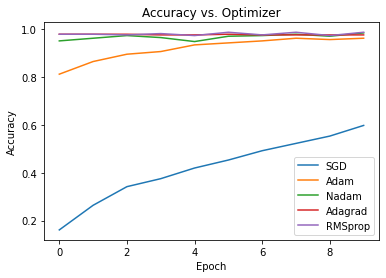

In [ ]:
# Define the neural network architecture

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=64))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# Train the neural network with different optimizers
batch_size = 100
epochs = 10

model.compile(SGD(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

model.compile(Nadam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_nadam = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

model.compile(Adagrad(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_adagrad = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

model.compile(RMSprop(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Plot the accuracy for each optimizer
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.plot(history_nadam.history['val_accuracy'], label='Nadam')
plt.plot(history_adagrad.history['val_accuracy'], label='Adagrad')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop')
plt.title('Accuracy vs. Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()




/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
15/15 [==============================] - 2s 47ms/step - loss: 5.3009 - accuracy: 0.1489 - val_loss: 3.1664 - val_accuracy: 0.2639
Epoch 2/10
15/15 [==============================] - 0s 17ms/step - loss: 2.8994 - accuracy: 0.2804 - val_loss: 2.4766 - val_accuracy: 0.3389
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 2.4389 - accuracy: 0.3152 - val_loss: 2.1807 - val_accuracy: 0.3889
Epoch 4/10
15/15 [==============================] - 0s 14ms/step - loss: 2.1976 - accuracy: 0.3493 - val_loss: 1.9791 - val_accuracy: 0.4056
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 2.0141 - accuracy: 0.3688 - val_loss: 1.8298 - val_accuracy: 0.4361
Epoch 6/10
15/15 [==============================] - 0s 12ms/step - loss: 1.8702 - accuracy: 0.3918 - val_loss: 1.7021 - val_accuracy: 0.4500
Epoch 7/10
15/15 [==============================] - 0s 17ms/step - loss: 1.7429 - accuracy: 0.4057 - val_loss: 1.5945 - val_accuracy: 0.4611
Epoch 8/10
15/

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 25ms/step - loss: 1.1460 - accuracy: 0.5992 - val_loss: 0.7726 - val_accuracy: 0.7639
Epoch 2/10
15/15 [==============================] - 0s 8ms/step - loss: 0.7258 - accuracy: 0.7808 - val_loss: 0.5397 - val_accuracy: 0.8500
Epoch 3/10
15/15 [==============================] - 0s 7ms/step - loss: 0.5146 - accuracy: 0.8559 - val_loss: 0.3818 - val_accuracy: 0.8972
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.3763 - accuracy: 0.8991 - val_loss: 0.2920 - val_accuracy: 0.9333
Epoch 5/10
15/15 [==============================] - 0s 7ms/step - loss: 0.2918 - accuracy: 0.9200 - val_loss: 0.2273 - val_accuracy: 0.9333
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.2341 - accuracy: 0.9388 - val_loss: 0.1832 - val_accuracy: 0.9583
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.1931 - accuracy: 0.9436 - val_loss: 0.1581 - val_accuracy: 0.9667
Epoch 8/10
15/15 [============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/nadam.py:89: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 23ms/step - loss: 0.1177 - accuracy: 0.9673 - val_loss: 0.1019 - val_accuracy: 0.9778
Epoch 2/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0967 - accuracy: 0.9749 - val_loss: 0.0941 - val_accuracy: 0.9806
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0826 - accuracy: 0.9812 - val_loss: 0.0976 - val_accuracy: 0.9750
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0710 - accuracy: 0.9833 - val_loss: 0.0795 - val_accuracy: 0.9861
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0606 - accuracy: 0.9868 - val_loss: 0.0747 - val_accuracy: 0.9861
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0537 - accuracy: 0.9889 - val_loss: 0.0692 - val_accuracy: 0.9833
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0451 - accuracy: 0.9923 - val_loss: 0.0718 - val_accuracy: 0.9861
Epoch 8/10
15/15 [============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adagrad.py:84: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 0.0241 - accuracy: 0.9972 - val_loss: 0.0552 - val_accuracy: 0.9861
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0234 - accuracy: 0.9972 - val_loss: 0.0547 - val_accuracy: 0.9861
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 0.9965 - val_loss: 0.0553 - val_accuracy: 0.9861
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0228 - accuracy: 0.9965 - val_loss: 0.0546 - val_accuracy: 0.9861
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0228 - accuracy: 0.9965 - val_loss: 0.0543 - val_accuracy: 0.9861
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0226 - accuracy: 0.9965 - val_loss: 0.0551 - val_accuracy: 0.9861
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0223 - accuracy: 0.9972 - val_loss: 0.0557 - val_accuracy: 0.9861
Epoch 8/10
15/15 [============

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 2s 40ms/step - loss: 0.0423 - accuracy: 0.9882 - val_loss: 0.0577 - val_accuracy: 0.9750
Epoch 2/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0235 - accuracy: 0.9958 - val_loss: 0.0579 - val_accuracy: 0.9889
Epoch 3/10
15/15 [==============================] - 0s 10ms/step - loss: 0.0250 - accuracy: 0.9965 - val_loss: 0.0476 - val_accuracy: 0.9861
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0212 - accuracy: 0.9951 - val_loss: 0.0855 - val_accuracy: 0.9694
Epoch 5/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0171 - accuracy: 0.9986 - val_loss: 0.0538 - val_accuracy: 0.9833
Epoch 6/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 0.0575 - val_accuracy: 0.9778
Epoch 7/10
15/15 [==============================] - 0s 9ms/step - loss: 0.0127 - accuracy: 0.9993 - val_loss: 0.0484 - val_accuracy: 0.9806
Epoch 8/10
15/15 [===========

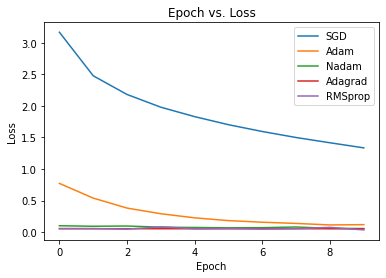

In [ ]:
# Define the neural network architecture

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=64))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# Train the neural network with different optimizers
batch_size = 100
epochs = 10

model.compile(SGD(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

model.compile(Nadam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_nadam = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

model.compile(Adagrad(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_adagrad = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

model.compile(RMSprop(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Plot the accuracy for each optimizer
plt.plot(history_sgd.history['val_loss'], label='SGD')
plt.plot(history_adam.history['val_loss'], label='Adam')
plt.plot(history_nadam.history['val_loss'], label='Nadam')
plt.plot(history_adagrad.history['val_loss'], label='Adagrad')
plt.plot(history_rmsprop.history['val_loss'], label='RMSprop')
plt.title('Epoch vs. Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()


# **Best Model**

In [ ]:
# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=64))

model.add(Dense(30, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.01)),
model.add(Dense(10, activation='sigmoid'))

# Compile the model
model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy'])




# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=0)


# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, specificity, sensitivity, PPVs, and NPVs
total = np.sum(confusion)
accuracy = np.trace(confusion) / float(total)
specificity = np.diag(confusion)[0] / np.sum(confusion[0])
sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

# Print the results
print("Accuracy:", accuracy)
print("Loss: {:.2f}".format(scores[0]))
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)


Epoch 1/10
15/15 [==============================] - 1s 20ms/step - loss: 4.1612 - accuracy: 0.1969 - val_loss: 2.6043 - val_accuracy: 0.3361
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 2.3108 - accuracy: 0.3751 - val_loss: 1.7928 - val_accuracy: 0.5306
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 1.6965 - accuracy: 0.5539 - val_loss: 1.3272 - val_accuracy: 0.6972
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 1.2791 - accuracy: 0.7077 - val_loss: 0.9748 - val_accuracy: 0.8139
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.9738 - accuracy: 0.8051 - val_loss: 0.7347 - val_accuracy: 0.8972
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.7751 - accuracy: 0.8685 - val_loss: 0.5986 - val_accuracy: 0.9278
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6387 - accuracy: 0.9047 - val_loss: 0.5120 - val_accuracy: 0.9444
Epoch 8/10
15/15 [=

# **Regularization - Achini**

In [ ]:
# Define the neural network architecture
modelReg = Sequential()
modelReg.add(Dense(64, activation='relu', input_dim=64))
modelReg.add(Dense(30, activation='relu',kernel_regularizer=l2(0.01)))
modelReg.add(Dense(10, activation='sigmoid'))



# Compile the model
modelReg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
modelReg.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion = confusion_matrix(y_test_classes, y_pred_classes)

# Compute accuracy, specificity, sensitivity, PPVs, and NPVs
total = np.sum(confusion)
accuracy = np.trace(confusion) / float(total)
specificity = np.diag(confusion)[0] / np.sum(confusion[0])
sensitivity = np.diag(confusion)[1] / np.sum(confusion[1])
ppv = np.diag(confusion)[1] / np.sum(confusion[:, 1])
npv = np.diag(confusion)[0] / np.sum(confusion[:, 0])

# Print the results
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("PPV:", ppv)
print("NPV:", npv)

Epoch 1/10
15/15 [==============================] - 1s 23ms/step - loss: 2.9890 - accuracy: 0.2011 - val_loss: 2.0294 - val_accuracy: 0.3444
Epoch 2/10
15/15 [==============================] - 0s 7ms/step - loss: 1.6845 - accuracy: 0.5692 - val_loss: 1.2592 - val_accuracy: 0.7500
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 1.1320 - accuracy: 0.7697 - val_loss: 0.8818 - val_accuracy: 0.8444
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.8519 - accuracy: 0.8483 - val_loss: 0.7041 - val_accuracy: 0.8972
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.7006 - accuracy: 0.8928 - val_loss: 0.5944 - val_accuracy: 0.9222
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6063 - accuracy: 0.9207 - val_loss: 0.5272 - val_accuracy: 0.9389
Epoch 7/10
15/15 [==============================] - 0s 8ms/step - loss: 0.5421 - accuracy: 0.9332 - val_loss: 0.4828 - val_accuracy: 0.9472
Epoch 8/10
15/15 [=

**Regularization Graph**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

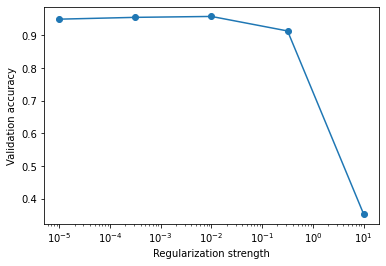

In [ ]:
# Define the regularization strengths to try
reg_strengths = np.logspace(-5, 1, 5)

# Train a model for each regularization strength and record the validation accuracy
val_accs = []
for reg_strength in reg_strengths:
    # Define the model
    modelRegGraph = Sequential()
    modelRegGraph.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(reg_strength)))
    modelRegGraph.add(Dense(30, activation='relu',kernel_regularizer=l2(reg_strength)))
    modelRegGraph.add(Dense(10, activation='softmax'))

    # Compile the model
    modelRegGraph.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = modelRegGraph.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=0)

    # Record the validation accuracy
    val_acc = history.history['val_accuracy'][-1]
    val_accs.append(val_acc)

# Plot the validation accuracy as a function of the regularization strength
plt.semilogx(reg_strengths, val_accs, '-o')
plt.xlabel('Regularization strength')
plt.ylabel('Validation accuracy')
plt.show()


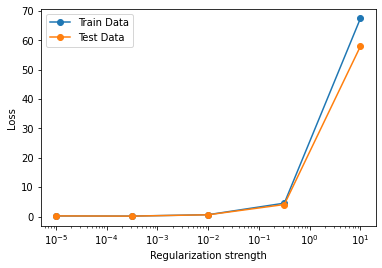

In [ ]:
# Layers 1

# Define the regularization strengths to try
reg_strengths = np.logspace(-5, 1, 5)

# Train a model for each regularization strength and record the validation accuracy
val_accs_train = []
val_accs_test = []
for reg_strength in reg_strengths:
    # Define the model
    modelRegGraph = Sequential()
    modelRegGraph.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(reg_strength)))
    modelRegGraph.add(Dense(30, activation='relu'))
    modelRegGraph.add(Dense(10, activation='sigmoid'))

    # Compile the model
    modelRegGraph.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = modelRegGraph.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=0)


    # Record the validation accuracy
    train_acc = history.history['loss'][-1]
    test_acc = history.history['val_loss'][-1]
    val_accs_train.append(train_acc)
    val_accs_test.append(test_acc)



# Plot the validation accuracy as a function of the regularization strength
plt.semilogx(reg_strengths, val_accs_train, '-o', label="Train Data")
plt.semilogx(reg_strengths, val_accs_test, '-o', label="Test Data")

plt.xlabel('Regularization strength')
plt.ylabel('Loss')
plt.legend()
plt.show()

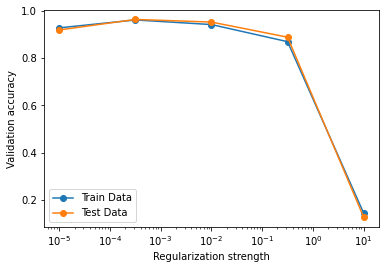

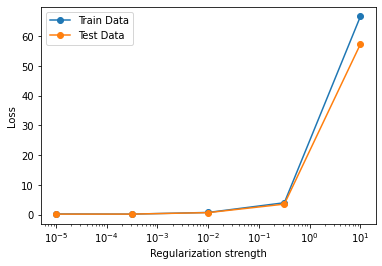

In [ ]:
# Layers all

# Define the regularization strengths to try
reg_strengths = np.logspace(-5, 1, 5)

# Train a model for each regularization strength and record the validation accuracy
val_accs_train = []
val_accs_test = []
for reg_strength in reg_strengths:
    # Define the model
    modelRegGraph = Sequential()
    modelRegGraph.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(reg_strength)))
    modelRegGraph.add(Dense(30, activation='relu', kernel_regularizer=l2(reg_strength)))
    modelRegGraph.add(Dense(10, activation='sigmoid', kernel_regularizer=l2(reg_strength)))

    # Compile the model
    modelRegGraph.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = modelRegGraph.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=0)

    # Record the validation accuracy

    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]
    val_accs_train.append(train_acc)
    val_accs_test.append(test_acc)

# Plot the validation accuracy as a function of the regularization strength
# plt.semilogx(reg_strengths, val_accs_train, '-o', label="Train Data")
plt.semilogx(reg_strengths, val_accs_train, '-o', label="Train Data")
plt.semilogx(reg_strengths, val_accs_test, '-o', label="Test Data")

plt.xlabel('Regularization strength')
plt.ylabel('Validation accuracy')
plt.legend()
plt.show()

# Layers 1

# Define the regularization strengths to try
reg_strengths = np.logspace(-5, 1, 5)

# Train a model for each regularization strength and record the validation accuracy
val_accs_train = []
val_accs_test = []
for reg_strength in reg_strengths:
    # Define the model
    modelRegGraph = Sequential()
    modelRegGraph.add(Dense(64, activation='relu', input_dim=64, kernel_regularizer=l2(reg_strength)))
    modelRegGraph.add(Dense(30, activation='relu'))
    modelRegGraph.add(Dense(10, activation='sigmoid'))

    # Compile the model
    modelRegGraph.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = modelRegGraph.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=0)


    # Record the validation accuracy
    train_acc = history.history['loss'][-1]
    test_acc = history.history['val_loss'][-1]
    val_accs_train.append(train_acc)
    val_accs_test.append(test_acc)



# Plot the validation accuracy as a function of the regularization strength
plt.semilogx(reg_strengths, val_accs_train, '-o', label="Train Data")
plt.semilogx(reg_strengths, val_accs_test, '-o', label="Test Data")

plt.xlabel('Regularization strength')
plt.ylabel('Loss')
plt.legend()
plt.show()